# A/B TESTING

We Get our dataset from [this link](https://www.kaggle.com/tammyrotem/control-data/) and [this link](https://www.kaggle.com/tammyrotem/experiment-data/)

**OVERVIEW**<br><br>
We do AB testing on data from Udacity. We quoted [This Link](https://docs.google.com/document/u/1/d/1aCquhIqsUApgsxQ8-SQBAigFDcfWVVohLEXcV6jWbdI/pub?embedded=True) to get the explanation of the experiment :

"<i>
At the time of this experiment, Udacity courses currently have two options on the course overview page: "start free trial", and "access course materials". If the student clicks "start free trial", they will be asked to enter their credit card information, and then they will be enrolled in a free trial for the paid version of the course. After 14 days, they will automatically be charged unless they cancel first. If the student clicks "access course materials", they will be able to view the videos and take the quizzes for free, but they will not receive coaching support or a verified certificate, and they will not submit their final project for feedback.


In the experiment, Udacity tested a change where if the student clicked "start free trial", they were asked how much time they had available to devote to the course. If the student indicated 5 or more hours per week, they would be taken through the checkout process as usual. If they indicated fewer than 5 hours per week, a message would appear indicating that Udacity courses usually require a greater time commitment for successful completion, and suggesting that the student might like to access the course materials for free. At this point, the student would have the option to continue enrolling in the free trial, or access the course materials for free instead. This [screenshot](https://drive.google.com/file/d/0ByAfiG8HpNUMakVrS0s4cGN2TjQ/view) shows what the experiment looks like.

The hypothesis was that this might set clearer expectations for students upfront, thus reducing the number of frustrated students who left the free trial because they didn't have enough time—without significantly reducing the number of students to continue past the free trial and eventually complete the course. If this hypothesis held true, Udacity could improve the overall student experience and improve coaches' capacity to support students who are likely to complete the course.</i>"

**In other words, we want to know if with the experiment, students will be likely to access free course thus do not click free trial (because there are clearer expectation and this make student do not waste their free time). But, because the number of student who will be likely to click free course is the one with the comitment to more than 5 hours per week, they will, eventualy pay to further comitted in this course. We want to check this statement using various method.** <br><br>
Our thought process is : 
1. Expanatory data Analysis to find the difference between control and variation visually
2. Using various statistic test, determine is there any significance difference between them statiscaly. 

# Data Preprocessing
<br><br>
First we import the necesary modules

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from statsmodels.graphics.gofplots import qqplot

<br><br>
We import our data and do a little bit explanotory data. 

In [33]:
data_c = pd.read_csv('control_data.csv')
data_v = pd.read_csv('experiment_data.csv')
data_c.head()

,Date,Pageviews,Clicks,Enrollments,Payments
0,"Sat, Oct 11",7723,687,134.0,70.0
1,"Sun, Oct 12",9102,779,147.0,70.0
2,"Mon, Oct 13",10511,909,167.0,95.0
3,"Tue, Oct 14",9871,836,156.0,105.0
4,"Wed, Oct 15",10014,837,163.0,64.0


In [3]:
data_v.head()

,Date,Pageviews,Clicks,Enrollments,Payments
0,"Sat, Oct 11",7716,686,105.0,34.0
1,"Sun, Oct 12",9288,785,116.0,91.0
2,"Mon, Oct 13",10480,884,145.0,79.0
3,"Tue, Oct 14",9867,827,138.0,92.0
4,"Wed, Oct 15",9793,832,140.0,94.0


<br><br>
Our data, is grouped on Date between Oct 11 to Nov 16. The meaning of each column is: <br><br>

- **Pageviews**: Number of unique cookies to view the course overview page that day.
- **Clicks**: Number of unique cookies to click the course overview page that day.
- **Enrollments**: Number of user-ids to enroll in the free trial that day.
- **Payments**: Number of user-ids who who enrolled on that day to remain enrolled for 14 days and thus make a payment. (Note that the date for this column is the start date, that is, the date of enrollment, rather than the date of the payment. The payment happened 14 days later. Because of this, the enrollments and payments are tracked for 14 fewer days than the other columns.)

In [4]:
print('Number of unique Date : ',len(data_c['Date'].unique())) 
print(data_c.isnull().sum())
print(data_c[data_c['Enrollments'].isnull()])

Number of unique Date :  37
Date            0
Pageviews       0
Clicks          0
Enrollments    14
Payments       14
dtype: int64
           Date  Pageviews  Clicks  Enrollments  Payments
23   Mon, Nov 3       9437     788          NaN       NaN
24   Tue, Nov 4       9420     781          NaN       NaN
25   Wed, Nov 5       9570     805          NaN       NaN
26   Thu, Nov 6       9921     830          NaN       NaN
27   Fri, Nov 7       9424     781          NaN       NaN
28   Sat, Nov 8       9010     756          NaN       NaN
29   Sun, Nov 9       9656     825          NaN       NaN
30  Mon, Nov 10      10419     874          NaN       NaN
31  Tue, Nov 11       9880     830          NaN       NaN
32  Wed, Nov 12      10134     801          NaN       NaN
33  Thu, Nov 13       9717     814          NaN       NaN
34  Fri, Nov 14       9192     735          NaN       NaN
35  Sat, Nov 15       8630     743          NaN       NaN
36  Sun, Nov 16       8970     722          NaN       NaN

<br><br>
For this reason, because we want to know if there are difference between student who enrolled and who do the payments, we drop other variables. We also drop those null observation as our main focus is enrollements and payments. But, before we jumped down into those, see different between number of people who cliked the course overview below :

In [34]:
a=data_c
b=data_v
data_c=data_c.dropna()
data_v=data_v.dropna()

In [35]:
diff_page = data_c['Clicks']-data_v['Clicks']
print('Average difference between clicks on experiment : ',diff_page.mean())
diff_page

Average difference between clicks on experiment :  1.434782608695652


0      1
1     -6
2     25
3      9
4      5
5     35
6    -32
7    -20
8     -6
9      1
10     3
11    37
12    23
13   -24
14    22
15    15
16   -12
17     0
18    12
19     6
20   -16
21   -14
22   -31
Name: Clicks, dtype: int64

<br><br>
In result above, negative means ' Control ' Has less clicks than ' Variants ' and positive means ' Control ' has more clicked than ' Variants '. If we average these result, we get 1.4348 means on average, ' Control ' has 1.4348 more clicks than ' Variants '. Because this number is not to significant, we ignore these result and assume people who visited couse with course design ' Control ' is the same with ' Variants '

In [36]:
data_c = data_c.drop(columns=['Date','Pageviews','Clicks'])
data_v = data_v.drop(columns=['Date','Pageviews','Clicks'])

In [37]:
des_c=data_c.describe()
des_v=data_v.describe()
des_c-des_v


,Enrollments,Payments
count,0.000000,0.000000
mean,15.739130,3.826087
std,-3.257226,-2.410639
min,16.000000,22.000000
25%,19.500000,1.000000
50%,20.000000,0.000000
75%,3.000000,3.500000
max,20.000000,5.000000


<br><br>
If we comppared the statistic descriptive difference between those groups, we have positive number of those 2 columns except std. This, means that statisticaly, user in ' Control ' has more student who Enroll and Pay in the next 14 days rather than ' Payments '. To make us more convincing, we use distplot below 

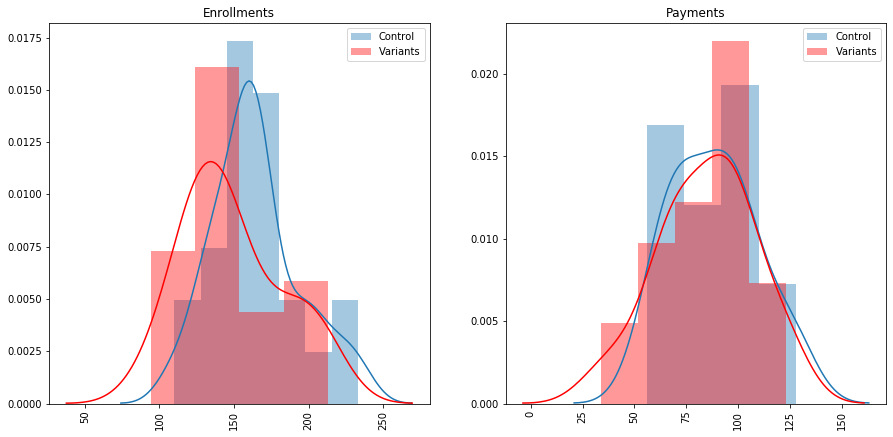

In [38]:
f = plt.figure(figsize=(15,7))
i=1
column = data_c.columns
for col in column:
    f.add_subplot(1,2,i)
    sns.distplot(data_c[col],label='Control',hist=True)
    sns.distplot(data_v[col],color='red',label='Variants',hist=True)
    plt.xticks(rotation=90,fontsize=10)
    plt.title(col)
    plt.legend()
    plt.xlabel("")
    i+=1

plt.show()

<br><br>
It looks like in column Enrollments, *Variants* is in general has less users rather than *Control*. In *Payment* however, we see that they are kinda similar or even *Control* has higher value than *Variants*

In [48]:
data=data_c.append(data_v)
a=['control']*23
b=['variants']*23
data['Type']=a+b
data.head()

,Enrollments,Payments,Type
0,134.0,70.0,control
1,147.0,70.0,control
2,167.0,95.0,control
3,156.0,105.0,control
4,163.0,64.0,control


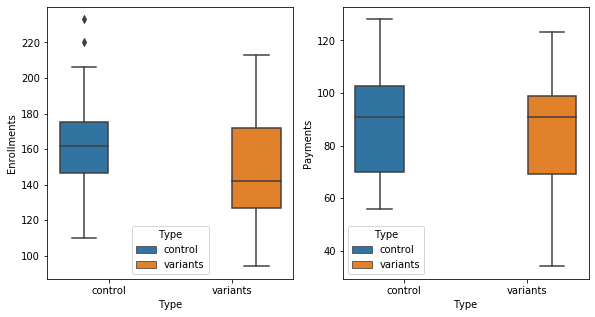

In [49]:
f = plt.figure(figsize=(15,5))
i=1
for col in data_c.columns:
    f.add_subplot(1,3,i)
    sns.boxplot(x='Type',y=col,data=data,hue='Type')
    i+=1

plt.show()

<br><br>
Using boxplot, we see that *Variants" has more higher range values. 

In [76]:
data_g=data.groupby('Type').sum()
data_g

,Enrollments,Payments
Type,,
control,3785.0,2033.0
variants,3423.0,1945.0


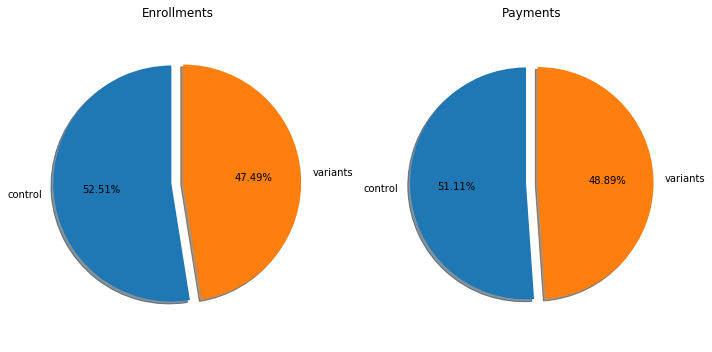

In [77]:

f=plt.figure(figsize=(10,5))
for i,col in enumerate(data_g.columns) :   
    # Pie chart
    # only "explode" the 2nd slice (i.e. 'variants')
    explode = (0, 0.1)  
    f.add_subplot(1,2,i+1)
    plt.pie(data_g[col], explode=explode, labels=data_g.index, autopct='%.2f%%',
            shadow=True, startangle=90)
    # Equal aspect ratio ensures that pie is drawn as a circle
    plt.axis('equal')  
    plt.tight_layout()
    plt.title(col)
plt.show()

In [134]:
data_c['Ratio']=(data_c['Payments']/data_c['Enrollments'])
data_v['Ratio']=(data_v['Payments']/data_v['Enrollments'])
print('Average of ratio Payments/Enrollments Control',data_c['Ratio'].mean())
print('\nAverage of ratio Payments/Enrollments Variants',data_v['Ratio'].mean())

Average of ratio Payments/Enrollments Control 0.5397972694238636

Average of ratio Payments/Enrollments Variants 0.5731397768902483


<br><br>
Lastly, we see that *Control* has more Enrollments and more Payments rather than *Variants*. We can conclude from here, that visualy, *Control* has more advantage rather than *Variants*. Before we jump down to statistic method, we see that in ratio, *Variants* has higher ratio rather than *Control*, means that 57% of user who enroll in *Variant* is continue to comitted to course while 54% of *Control* commited.<br>
<br>
We seek to further analyze it by using statistic test. By QQPLOT below (and distplot above) we see that our data is not normal, so we use **Parametric Test** that is *Man-Whitney Test* which is basicaly t-test in non-parametric way. 

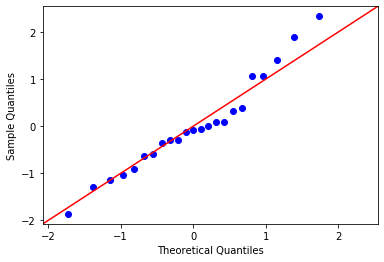

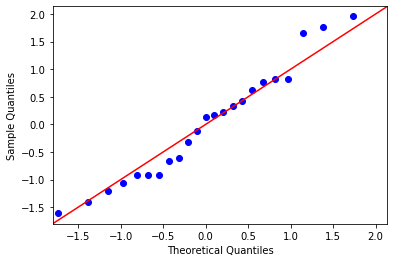

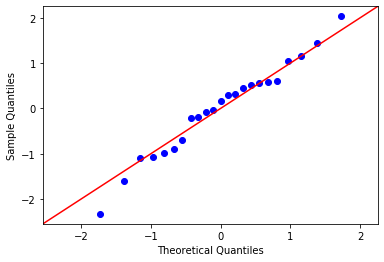

In [137]:
for i,col in enumerate(data_c.columns):
    qqplot(data_c[col],fit=True,line='45')
plt.show()

<br><br>
**Man Whitney Test**, in general (quoted from wikipedia) *the Mann–Whitney U test (also called the Mann–Whitney–Wilcoxon (MWW), Wilcoxon rank-sum test, or Wilcoxon–Mann–Whitney test) is a nonparametric test of the null hypothesis that it is equally likely that a randomly selected value from one sample will be less than or greater than a randomly selected value from a second sample*.<br><br>

This test can be used to investigate whether two independent samples were selected from populations having the same distribution. A similar nonparametric test used on dependent samples is the Wilcoxon signed-rank test. <br><br>

A very general formulation is to assume that:<br>

- All the observations from both groups are independent of each other,
- The responses are ordinal (i.e., one can at least say, of any two observations, which is the greater),
- Under the null hypothesis H0, the distributions of both populations are equal.[3]
- The alternative hypothesis H1 is that the distributions are not equal.

<br><br>
Using this test, we want to know if **Control** and **Variants** has the same distribution on each columns (*Enrollments, Payments*, and *Ratio*). If null hipotesis is rejected, then we can say that **Control** and **Variants** has different distribution, which means there are significance difference between them. If null hipotesis is accepted, then we can say that **Control** and **Variants** has same distribution or in other words, there are no significance difference between them.

In [138]:

col=data_c.columns
for i in col:
    print(i)
    stat2, p2 = stats.mannwhitneyu(data_c[i], data_v[i],alternative='greater')
    stat3, p3 = stats.ttest_ind(data_c[i], data_v[i],equal_var=False)
    print('Columns {} has t-statistics {} with p-value {}'.format(i,stat2,p2))
    if p2<0.05:
        print('Reject H0 : There is no enough evidence to say that the distribution of both data similar\n')
    else:
        print('Accept H0 : There is evidence that the distribution of both data similar\n')

Enrollments
Columns Enrollments has t-statistics 353.0 with p-value 0.026560008080183526
Reject H0 : There is no enough evidence to say that the distribution of both data similar

Payments
Columns Payments has t-statistics 284.5 with p-value 0.33410333815766224
Accept H0 : There is evidence that the distribution of both data similar

Ratio
Columns Ratio has t-statistics 209.0 with p-value 0.890702762168325
Accept H0 : There is evidence that the distribution of both data similar



# Conclusion :

<br><br>
From here, we get that for Enrollments, statisticaly, *Control* and *Variants* is difference, and from EDA above we see that Enrollments in *Control* is higher. It's make sense as because it's free, people want to try the course anyway. But, in *Variants*, people is given questions and statement that make them wonder if they could *commit* at all, and therefore some people do not click the free trial. <br>

On the other hand, in Payments, in EDA the different between *COntrol* and *Variants* is not significance much. Even if in ratio, *Variant* has more percentage, statisticaly, difference of people who pay (or commited after 14 days) in both *Control* and *Variants* do not significanly difference. 
<br>
<br>
Here, we can **conclude** that giving variants define in above, do not increasing Payments of people. It does however, decrease the amount of people who want to do the free trial. We recommend to not use the *Variants* design but use the original *Control* instead. 
